In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler

In [0]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)

x_train = torch.autograd.Variable(torch.Tensor(imagenes).float())
x_train = x_train.unsqueeze(1)

mean = x_train.mean(dim=0)
std = x_train.std(dim=0)
std[std==0]=1.0

for i in range(len(x_train)):
    x_train[i] = (x_train[i]-mean)/std

In [0]:

v0 = [16,8,10,4,2,2]
v1 = [16,8,10,5,2,2]
v2 = [16,8,10,3,2,1]
v3 = [16,8,10,4,3,2]
v4 = [16,8,10,4,3,1]
v5 = [16,8,10,3,3,1]
v6 = [16,8,10,3,2,2]
v7 = [16,8,10,5,2,1]
v8 = [16,8,10,2,1,1]
v9 = [16,8,10,2,2,1]

cambios = np.array((v0, v1,v2, v3,v4, v5,v6, v7,v8, v9))

In [63]:
loss_value = np.zeros(10)
n_c = np.zeros(10)
n_l = np.zeros([10,4])

for i in range(10):
  print(i)
  n_1,n_2,n_3,n_4,n_5,n_6 = cambios[i,:]
  class Autoencoder(torch.nn.Module):
      def __init__(self):
          super(Autoencoder,self).__init__()
          self.encoder = torch.nn.Sequential(
              torch.nn.Conv2d(1, n_1, kernel_size=n_4),
              torch.nn.Conv2d(n_1,n_2,kernel_size=n_5),
              torch.nn.Conv2d(n_2,n_3,kernel_size=n_6))
          self.decoder = torch.nn.Sequential(             
              torch.nn.ConvTranspose2d(n_3,n_2,kernel_size=n_6),
              torch.nn.ConvTranspose2d(n_2,n_1,kernel_size=n_5),
              torch.nn.ConvTranspose2d(n_1,1,kernel_size=n_4))
      def forward(self,x):
          x = self.encoder(x)
          x = self.decoder(x)
          return x

  num_epochs = 100
  model = Autoencoder()
  distance = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

  for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  loss_value[i] = loss.item()
  model_parameters = filter(lambda p: p.requires_grad, model.parameters())
  n_c[i] = sum([np.prod(p.size()) for p in model_parameters])
  x_transform = model(x_train)
  latent_space = model.encoder(x_train)
  n_l[i,:] = np.shape(latent_space) 

0
1
2
3
4
5
6
7
8
9


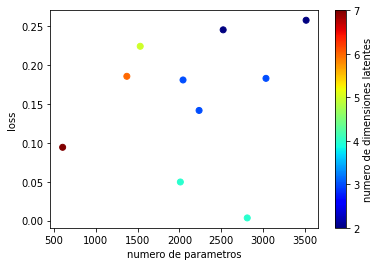

In [81]:
plt.scatter(n_c,loss_value, c = n_l[:,3])
plt.xlabel('numero de parametros')
plt.ylabel('loss')
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('numero de dimensiones latentes')

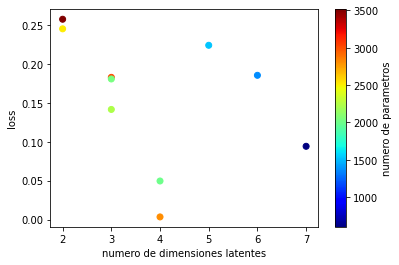

In [82]:
plt.scatter(n_l[:,3], loss_value, c = n_c)
plt.xlabel('numero de dimensiones latentes')
plt.ylabel('loss')
cbar = plt.colorbar()
cbar.set_label('numero de parametros')

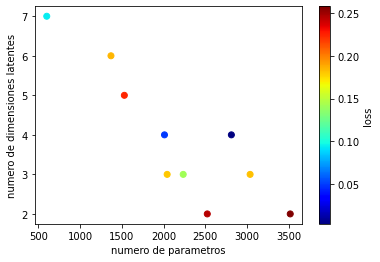

In [83]:
plt.scatter(n_c,n_l[:,3], c = loss_value)
plt.xlabel('numero de parametros')
plt.ylabel('numero de dimensiones latentes')
cbar = plt.colorbar()
cbar.set_label('loss')

De los resultados obtenidos se puede concluir que cuando se tienen menos dimensiones latentes el loss es mayor. De igual forma, es mas conveniente para el modelo tener una mayor cantidad de parametros.



In [43]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

n_p = 0

for m in model.parameters():
  n_p+=m.flatten().size()[0]

print(n_p)

2175
2175
